In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
sales_data = pd.read_csv(r'C:\Users\Hp Pc\Downloads\Telegram Desktop\sales_data (2).csv')

# DATA CLEANING AND MANIPULATION

In [4]:
sales_data.head(10)

,Date,Product,Region,Units Sold,Unit Price,Total Sales
0,2024-01-01,Clothing,South,40,275.402517,11016.100698
1,2024-01-02,Clothing,South,51,946.638119,48278.544053
2,2024-01-03,Electronics,West,15,68.757222,1031.358328
3,2024-01-04,Electronics,West,35,546.707440,19134.760392
4,2024-01-05,Electronics,North,10,921.104220,9211.042204
5,2024-01-06,Furniture,West,23,123.550541,2841.662444
6,2024-01-07,Electronics,South,86,991.588236,85276.588256
7,2024-01-08,Furniture,East,71,343.764472,24407.277530
8,2024-01-09,Electronics,West,1,837.113883,837.113883
9,2024-01-10,Furniture,South,49,880.882115,43163.223629


In [5]:
sales_data.shape

(365, 6)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Product      365 non-null    object 
 2   Region       365 non-null    object 
 3   Units Sold   365 non-null    int64  
 4   Unit Price   365 non-null    float64
 5   Total Sales  365 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.2+ KB


In [46]:
sales_data.duplicated().sum()

0

In [7]:
sales_data.describe()

,Units Sold,Unit Price,Total Sales
count,365.000000,365.000000,365.000000
mean,50.358904,481.245870,24355.699414
std,28.196036,288.832108,21836.355037
min,1.000000,12.008845,53.650961
25%,27.000000,221.939683,6482.473260
50%,50.000000,486.463459,18166.276567
75%,76.000000,720.274807,35058.060323
max,99.000000,999.189681,95922.209330


In [8]:
sales_data.isnull().sum()

Date           0
Product        0
Region         0
Units Sold     0
Unit Price     0
Total Sales    0
dtype: int64

In [9]:
sales_data["Months"] = pd.to_datetime(sales_data["Date"]).dt.strftime("%b")

In [10]:
sales_data["Months"] 

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
360    Dec
361    Dec
362    Dec
363    Dec
364    Dec
Name: Months, Length: 365, dtype: object

In [11]:
sales_data["Day of the week"] = pd.to_datetime(sales_data["Date"]).dt.strftime("%a")

In [12]:
sales_data["Day of the week"]

0      Mon
1      Tue
2      Wed
3      Thu
4      Fri
      ... 
360    Thu
361    Fri
362    Sat
363    Sun
364    Mon
Name: Day of the week, Length: 365, dtype: object

In [13]:
sales_data["Year"] = pd.to_datetime(sales_data["Date"]).dt.strftime("%Y")

In [14]:
sales_data["Year"]

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
360    2024
361    2024
362    2024
363    2024
364    2024
Name: Year, Length: 365, dtype: object

In [15]:
sales_data.columns

Index(['Date', 'Product', 'Region', 'Units Sold', 'Unit Price', 'Total Sales',
       'Months', 'Day of the week', 'Year'],
      dtype='object')

In [16]:
sales_data.drop("Date",axis=1,inplace=True)

In [17]:
sales_data.columns

Index(['Product', 'Region', 'Units Sold', 'Unit Price', 'Total Sales',
       'Months', 'Day of the week', 'Year'],
      dtype='object')

# DATA DISTRIBUTION ANALYSIS BY VISUALIZATION

<Axes: xlabel='Units Sold', ylabel='Density'>

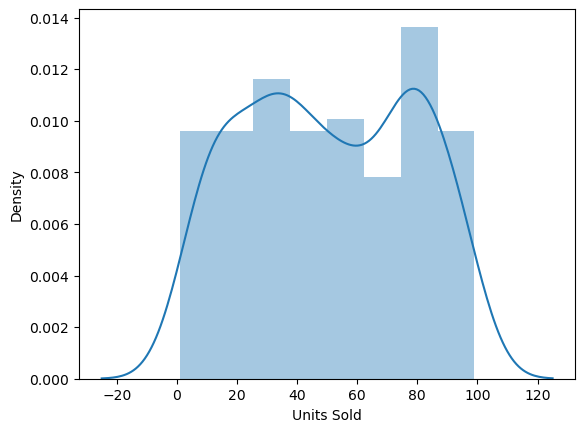

In [18]:
sns.distplot(sales_data['Units Sold'])

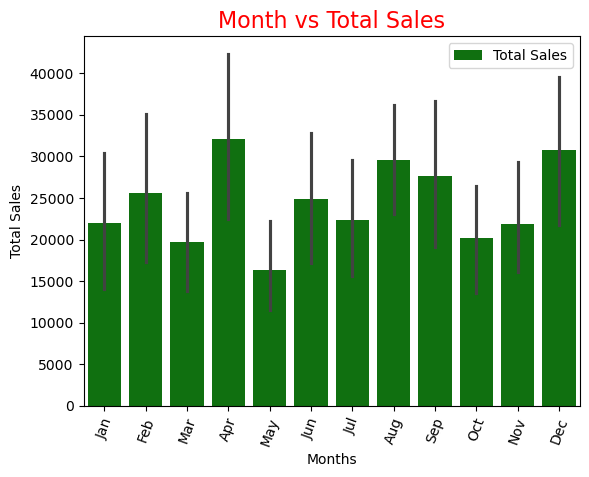

In [19]:
sns.barplot(x=sales_data['Months'],y=sales_data['Total Sales'], color= 'green', label= 'Total Sales')
plt.xticks(rotation=70)
plt.title("Month vs Total Sales",color= "red", fontsize= 16)
plt.legend()
plt.show()

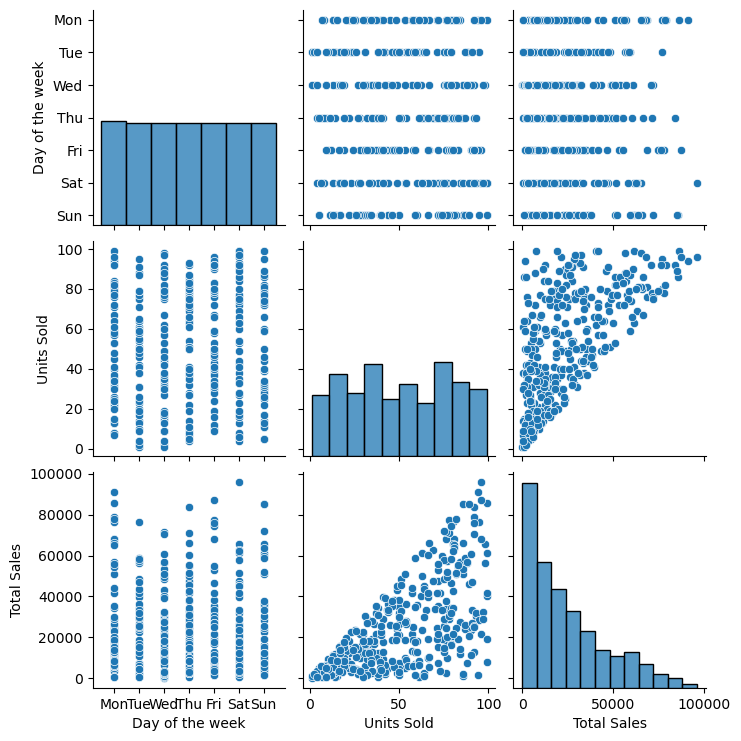

In [20]:
sns.pairplot(data=sales_data,vars=['Day of the week','Units Sold','Total Sales'])
plt.xticks(rotation=70)
plt.show()

<Figure size 1200x800 with 0 Axes>

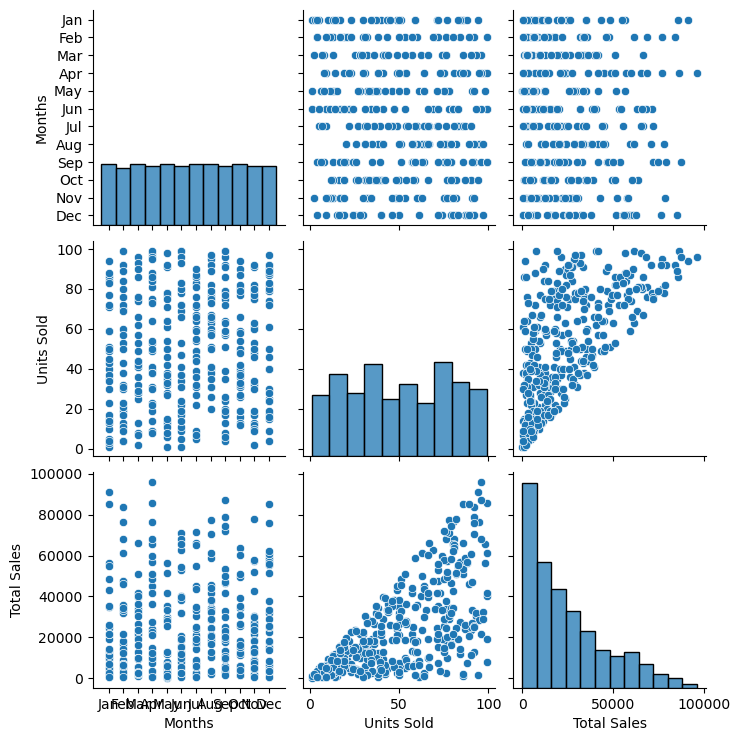

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot(data=sales_data,vars=['Months','Units Sold','Total Sales'])
plt.show()

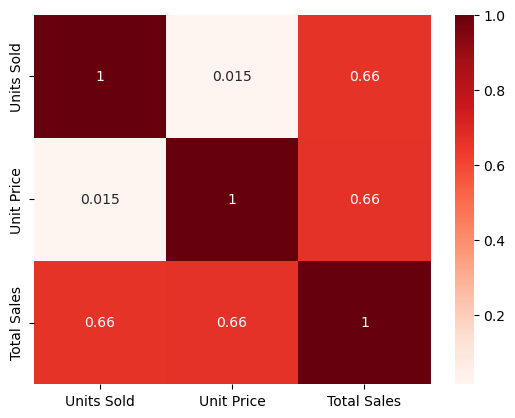

In [22]:
sns.heatmap(sales_data[['Units Sold', 'Unit Price', 'Total Sales']].corr(),annot=True,cmap='Reds')
plt.show()

In [23]:
sales_data[['Units Sold', 'Unit Price', 'Total Sales']].corr()

,Units Sold,Unit Price,Total Sales
Units Sold,1.000000,0.014860,0.657927
Unit Price,0.014860,1.000000,0.663418
Total Sales,0.657927,0.663418,1.000000


<BarContainer object of 365 artists>

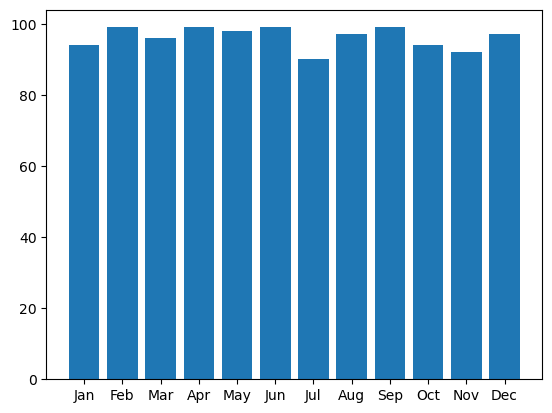

In [24]:
plt.bar(sales_data['Months'],sales_data['Units Sold'])

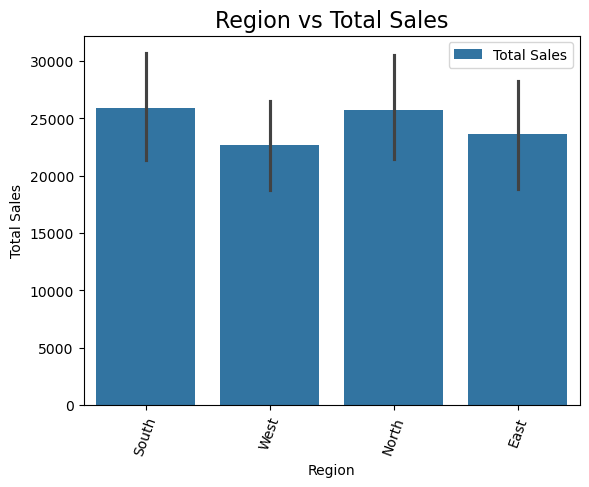

In [32]:
sns.barplot(x=sales_data['Region'],y=sales_data['Total Sales'], label= 'Total Sales')
plt.xticks(rotation=70)
plt.title("Region vs Total Sales", fontsize= 16)
plt.legend()
plt.show()

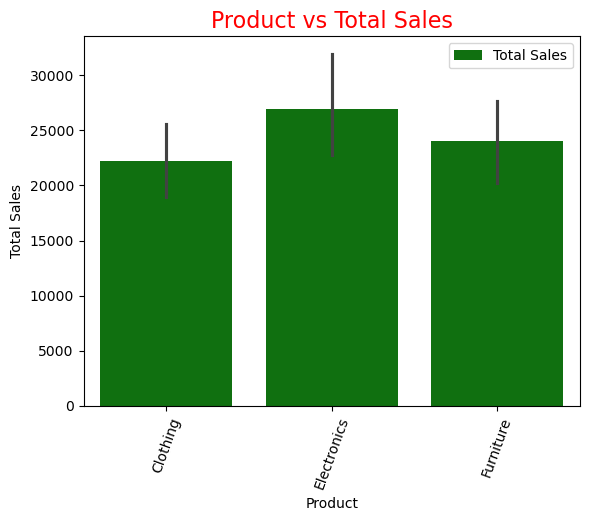

In [33]:
sns.barplot(x=sales_data['Product'],y=sales_data['Total Sales'], color= 'green', label= 'Total Sales')
plt.xticks(rotation=70)
plt.title("Product vs Total Sales",color= "red", fontsize= 16)
plt.legend()
plt.show()

# QUANTITATIVE ANALYSIS

In [45]:
sales_data.pivot_table(index='Months',values='Units Sold',aggfunc=['max','min','sum','mean'],margins=True,margins_name='Grand total')

,max,min,sum,mean
,Units Sold,Units Sold,Units Sold,Units Sold
Months,,,,
Apr,99,8,1625,54.166667
Aug,97,20,1890,60.967742
Dec,97,4,1633,54.433333
Feb,99,4,1339,46.172414
Jan,94,1,1306,42.129032
Jul,90,5,1647,53.129032
Jun,99,1,1519,50.633333
Mar,96,2,1471,47.451613


In [44]:
sales_data.pivot_table(index='Day of the week',values='Units Sold',aggfunc=['max','min','sum','mean'],margins=True,margins_name='Grand total')

,max,min,sum,mean
,Units Sold,Units Sold,Units Sold,Units Sold
Day of the week,,,,
Fri,96,9,2788,53.615385
Mon,99,7,2591,48.886792
Sat,99,4,2876,55.307692
Sun,99,5,2581,49.634615
Thu,93,4,2815,54.134615
Tue,95,1,2316,44.538462
Wed,98,1,2414,46.423077
Grand total,99,1,18381,50.358904


In [43]:
sales_data.pivot_table(index='Months',values='Total Sales',aggfunc=['max','min','sum','mean'],margins=True,margins_name='Grand total')

,max,min,sum,mean
,Total Sales,Total Sales,Total Sales,Total Sales
Months,,,,
Apr,95922.209330,710.985409,9.637752e+05,32125.841377
Aug,77546.991294,1862.618413,9.150823e+05,29518.782530
Dec,85183.142563,567.506077,9.229140e+05,30763.799368
Feb,83936.742905,362.282943,7.413310e+05,25563.138953
Jan,90973.809879,447.179590,6.814504e+05,21982.270113
Jul,71516.506133,640.401919,6.918923e+05,22319.105829
Jun,70965.982306,421.012069,7.449227e+05,24830.757091
Mar,66221.034428,1241.450981,6.113113e+05,19719.720608


In [42]:
sales_data.pivot_table(index='Day of the week',values='Total Sales',aggfunc=['max','min','sum','mean'],margins=True,margins_name='Grand total')

,max,min,sum,mean
,Total Sales,Total Sales,Total Sales,Total Sales
Day of the week,,,,
Fri,87066.562727,1508.306956,1.294667e+06,24897.436813
Mon,90973.809879,500.158314,1.561473e+06,29461.756568
Sat,95922.209330,710.985409,1.272143e+06,24464.297556
Sun,85276.588256,1294.479528,1.229587e+06,23645.909402
Thu,83936.742905,362.282943,1.346296e+06,25890.298172
Tue,76468.890515,447.179590,1.059999e+06,20384.587854
Wed,71516.506133,53.650961,1.125666e+06,21647.416124
Grand total,95922.209330,53.650961,8.889830e+06,24355.699414


In [39]:
sales_data.pivot_table(index='Months',columns='Product',values='Units Sold',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                  
Product     Clothing Electronics Furniture Grand total
Months                                                
Apr              300         614       711        1625
Aug              611         506       773        1890
Dec              251         621       761        1633
Feb              534         304       501        1339
Jan              430         512       364        1306
Jul              634         492       521        1647
Jun              542         479       498        1519
Mar              634         393       444        1471
May              477         367       578        1422
Nov              418         503       529        1450
Oct              571         681       243        1495
Sep              612         629       343        1584
Grand total     6014        6101      6266       18381

In [40]:
sales_data.pivot_table(index='Months',columns='Product',values='Total Sales',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                          
Product          Clothing   Electronics     Furniture   Grand total
Months                                                             
Apr          1.702385e+05  3.651229e+05  4.284138e+05  9.637752e+05
Aug          3.012492e+05  2.931329e+05  3.207002e+05  9.150823e+05
Dec          1.262015e+05  3.971695e+05  3.995430e+05  9.229140e+05
Feb          3.219946e+05  1.120735e+05  3.072628e+05  7.413310e+05
Jan          2.093305e+05  3.429323e+05  1.291875e+05  6.814504e+05
Jul          3.049779e+05  2.284020e+05  1.585123e+05  6.918923e+05
Jun          2.117780e+05  2.507158e+05  2.824289e+05  7.449227e+05
Mar          2.178523e+05  1.586409e+05  2.348182e+05  6.113113e+05
May          1.104400e+05  1.602906e+05  2.367806e+05  5.075112e+05
Nov          2.745511e+05  1.623370e+05  2.208372e+05  6.577253e+05
Oct          2.143110e+05  3.128984e+05  9.676057e+04  6.239699e+05
Sep          2.436594e+05  3.970203e+05  1.872650e+05  8.279447e+05
Grand total  2.706584e+06  3.180736e+06  3.002510e+06  8.889830e+06

In [41]:
sales_data.pivot_table(index='Months',columns='Region',values='Total Sales',aggfunc=['sum'],margins=True,margins_name='Grand total')

sum                                            \
Region               East         North         South          West   
Months                                                                
Apr          2.854357e+05  1.474336e+05  2.193398e+05  3.115662e+05   
Aug          1.371014e+05  1.279424e+05  2.640348e+05  3.860037e+05   
Dec          1.228734e+05  1.943828e+05  2.653722e+05  3.402855e+05   
Feb          1.151233e+05  1.763041e+05  2.174246e+05  2.324789e+05   
Jan          7.483966e+04  2.463134e+05  2.531333e+05  1.071640e+05   
Jul          2.124433e+05  1.259390e+05  5.657088e+04  2.969391e+05   
Jun          1.151872e+05  3.502553e+05  1.198575e+05  1.596227e+05   
Mar          1.277220e+05  1.999142e+05  1.196621e+05  1.640131e+05   
May          1.125749e+05  1.458920e+05  1.650366e+05  8.400770e+04   
Nov          1.829816e+05  1.091510e+05  1.613915e+05  2.042012e+05   
Oct          2.247169e+05  1.038621e+05  1.598473e+05  1.355436e+05   
Sep          1.076606e+05  3.128140e+05  1.996012e+05  2.078689e+05   
Grand total  1.818660e+06  2.240204e+06  2.201272e+06  2.629695e+06   

                           
Region        Grand total  
Months                     
Apr          9.637752e+05  
Aug          9.150823e+05  
Dec          9.229140e+05  
Feb          7.413310e+05  
Jan          6.814504e+05  
Jul          6.918923e+05  
Jun          7.449227e+05  
Mar          6.113113e+05  
May          5.075112e+05  
Nov          6.577253e+05  
Oct          6.239699e+05  
Sep          8.279447e+05  
Grand total  8.889830e+06

In [31]:
total_revenue=sales_data['Total Sales'].sum()
print(f'Total Sales for the year 2024 is ${total_revenue}')

Total Sales for the year 2024 is $8889830.285973264


# KEY NOTE FROM ANALYSIS
1. The highest sales were made in the month of April while May had the lowest sales for 2024.
2. Furnitures has the highest unit sold but has low sales while Electronics has the highest sales.
3. For the Regions in year 2024 South had the highest total sales while west has the lowest total sales for the year.
4. Total sales for the year was $8889830.285973264
5. Day of the week with the highest sales was Saturday while Wednesday was the lowest.